In [2]:
import pandas as pd

In [3]:
media = pd.read_hdf("clean_data.h5", 'media_merged')

In [4]:
media.columns.tolist()

['gbifID',
 'format',
 'identifier_media',
 'identifier_obs',
 'eventDate',
 'decimalLatitude',
 'decimalLongitude',
 'taxonID',
 'taxonRank',
 'taxonomicStatus',
 'taxonKey',
 'acceptedTaxonKey',
 'phylumKey',
 'classKey',
 'orderKey',
 'familyKey',
 'genusKey',
 'speciesKey',
 'species',
 'acceptedScientificName',
 'verbatimScientificName']

In [5]:
vcs = media['taxonID'].value_counts()

In [6]:
media.shape

(2803519, 21)

In [7]:
vcs.shape

(13149,)

In [8]:
vcs.head()

48715     48118
54134     43873
940028    34638
54573     33455
47392     32911
Name: taxonID, dtype: int64

In [9]:
media['media_count_per_taxonID'] = media['taxonID'].map( vcs )


<AxesSubplot: >

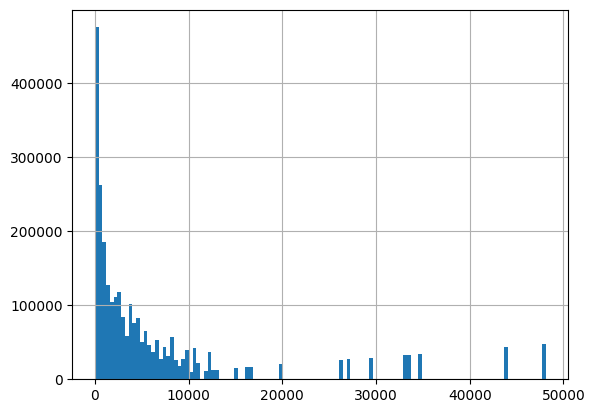

In [10]:
media['media_count_per_taxonID'].hist(bins=120)

In [11]:
media[ media['media_count_per_taxonID'] > 10 ].shape

(2779030, 22)

In [12]:
media[ media['media_count_per_taxonID'] > 10 ]['taxonID'].value_counts().shape

(7355,)

In [13]:
media[ media['media_count_per_taxonID'] > 50 ]['taxonID'].value_counts().shape

(3637,)

In [14]:
media[ media['media_count_per_taxonID'] > 100 ]['taxonID'].value_counts().shape

(2507,)

In [15]:
media[ media['media_count_per_taxonID'] > 200]['taxonID'].value_counts().shape

(1702,)

In [16]:
media[ media['media_count_per_taxonID'] > 300]['taxonID'].value_counts().shape

(1310,)

In [17]:
# media[ media['media_count_per_taxonID'] > 100 ].to_hdf( 'clean_data.h5' , 'media_merged_filtered-by-species' )

In [32]:
# I downloaded 8,927 images and they totaled 13836428 bytes
bpi = 14150122597/8927
gpi = bpi/(1024**3)

In [33]:
gpi*media[ media['media_count_per_taxonID'] > 100 ].shape[0]

3851.5337190798837

In [37]:
gpi*media[ media['media_count_per_taxonID'] > 500 ].shape[0]

3332.1537484791593

In [50]:
media[ media['media_count_per_taxonID'] > 100 ].shape

(2609029, 22)

In [69]:
media[ media['media_count_per_taxonID'] > 100 ]['media_count_per_taxonID'].value_counts()

48118    48118
43873    43873
34638    34638
33455    33455
32911    32911
         ...  
290        290
133        266
264        264
253        253
206        206
Name: media_count_per_taxonID, Length: 1126, dtype: int64

In [70]:
# Only use taxonIDs with more than 100 images
limit = media[
    ( media['media_count_per_taxonID'] > 100 )
]

In [91]:
# limit number of images per taxonID to 4000
limit2 = limit.groupby(by='taxonID').head(350)

In [92]:
# verifying that this did what we wanted and kept all taxonIDs but limited the number of rows for each taxonID
print(limit['taxonID'].value_counts())
print(limit.shape[0])
print()
print(limit2['taxonID'].value_counts())
print(limit2.shape[0])
print()
print(limit.shape[0] - limit2.shape[0])
print((limit.shape[0] - limit2.shape[0])/limit.shape[0])

48715     48118
54134     43873
940028    34638
54573     33455
47392     32911
          ...  
559228      101
350940      101
118362      101
463481      101
475193      101
Name: taxonID, Length: 2507, dtype: int64
2609029

147221     350
119998     350
194373     350
1111865    350
123789     350
          ... 
203657     101
1218680    101
332680     101
559228     101
1074029    101
Name: taxonID, Length: 2507, dtype: int64
665803

1943226
0.7448081259349743


In [93]:
gpi*limit2.shape[0]

982.8801077966339

In [94]:
limit2.to_hdf( 'clean_data.h5' , 'media_merged_filtered-by-species_350pt' )

/home/charlescoult/.conda/envs/fungi/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'media_merged_filtered-by-species_350pt'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/tmp/ipykernel_1850/2114062110.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['format', 'identifier_media', 'taxonRank', 'taxonomicStatus', 'species',
       'acceptedScientificName', 'verbatimScientificName'],
      dtype='object')]

  limit2.to_hdf( 'clean_data.h5' , 'media_merged_filtered-by-species_350pt' )
